In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

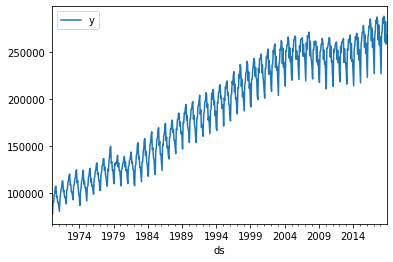

In [7]:
df.plot(x='ds',y='y');

In [8]:
df.shape[0]

588

In [9]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [10]:
train = df.iloc[:576]
test = df.iloc[576:]

In [11]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = model.make_future_dataframe(periods=12,freq='MS')

In [13]:
forecast = model.predict(future)

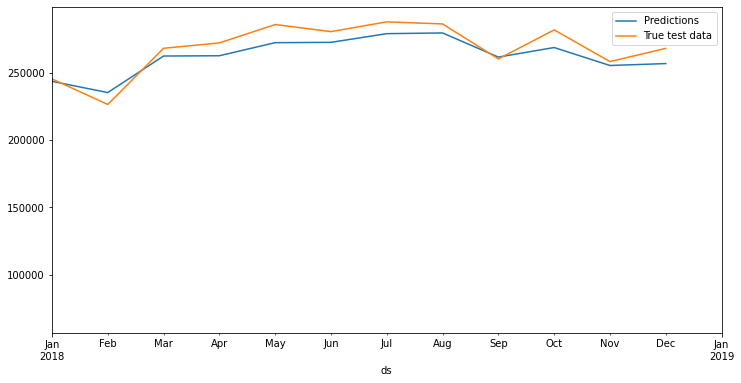

In [16]:
ax =   forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,6))
test.plot(x='ds',y='y',label='True test data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['y'],forecast.iloc[-12:]['yhat']))

In [21]:
test_mean = test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
print(f"RMSE for forecast: {rmse}")
print(f"Mean of the test set: {test_mean}")

RMSE for forecast: 8588.50451989775
Mean of the test set: y    268739.666667
dtype: float64


#### Using the cross validation to predict several times 

In [23]:
 from fbprophet.diagnostics import cross_validation,performance_metrics
 from fbprophet.plot import plot_cross_validation_metric

In [29]:
initial = 5*365
initial = str(initial) + ' days'

In [30]:
initial

'1825 days'

In [31]:
period = 5*365
period = str(period) + ' days'

In [32]:
period

'1825 days'

In [33]:
horizon = 365
horizon = str(horizon) + ' days'

In [34]:
df_cv = cross_validation(model,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [35]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107092.873780,109936.322247,102445.0,1976-12-11
1,1977-02-01,102996.111557,101596.398647,104464.850880,102416.0,1976-12-11
2,1977-03-01,118973.318267,117506.335683,120424.426265,119960.0,1976-12-11
3,1977-04-01,120612.923861,119099.446500,122052.481495,121513.0,1976-12-11
4,1977-05-01,127883.031986,126438.765160,129353.123844,128884.0,1976-12-11


In [36]:
len(df_cv)

108

In [37]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.3
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.3
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.4
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.3
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.4
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


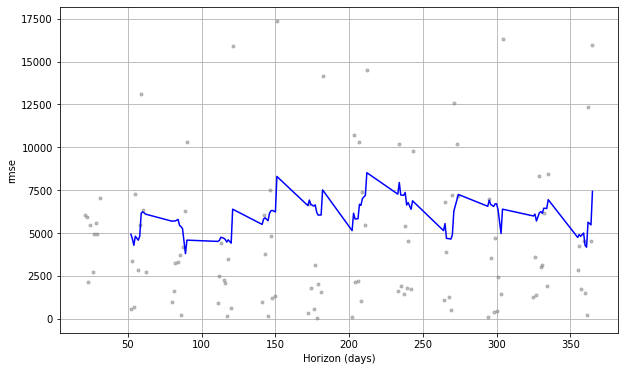

In [40]:
plot_cross_validation_metric(df_cv,metric='rmse');

## Check out the following link for more clearity on the cross_validation for the time series data
https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation